In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import os
import seaborn as sns
df = pd.read_csv('top_hits_clean.csv')

df.head()

,track_name,artist_name,genre,energy,length,popularity
0,señorita,shawn mendes,canadian pop,55,191,79
1,china,anuel aa,reggaeton flow,81,302,92
2,boyfriend (with social house),ariana grande,dance pop,80,186,85
3,beautiful people (feat_ khalid),ed sheeran,pop,65,198,86
4,goodbyes (feat_ young thug),post malone,dfw rap,65,175,94


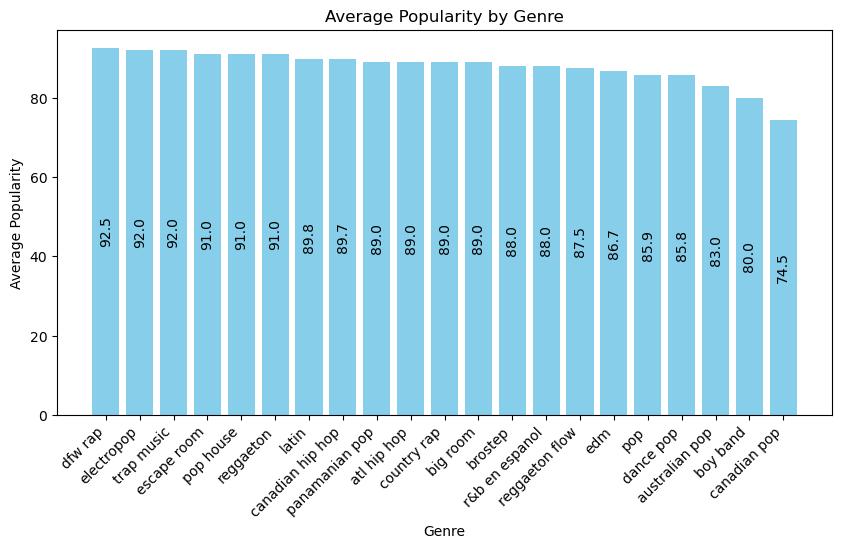

In [3]:
# Average Popularity by Genre
# --- Shows whether the band's style has potential ---

genre_popularity = (
    df.groupby("genre", as_index=False)["popularity"]
      .mean()
      .rename(columns={"popularity": "avg_popularity"})
      .sort_values("avg_popularity", ascending=False)
)

plt.figure(figsize=(10,5))
bars = plt.bar(genre_popularity["genre"], genre_popularity["avg_popularity"], color="skyblue")
plt.title("Average Popularity by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45, ha="right")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f"{height:.1f}",
             ha="center", va="center", fontsize=10, rotation=90, color="black")

plt.show()

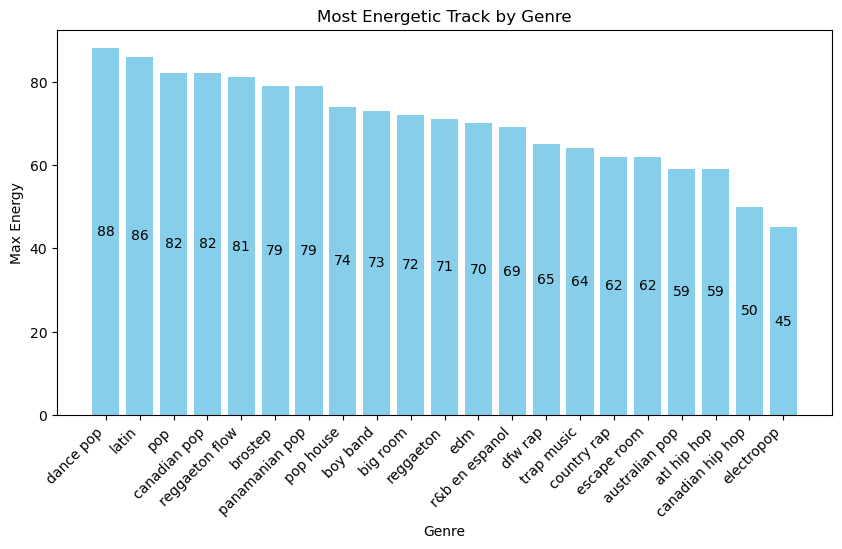

In [4]:
# Most Energetic Track by Genre
# --- Gives an idea of ​​the “tone” that most attracts the public ---

max_energy = (
    df.loc[df.groupby("genre")["energy"].idxmax(), ["genre", "track_name", "artist_name", "energy"]]
      .rename(columns={"track_name": "track", "artist_name": "artist", "energy": "max_energy"})
      .sort_values("max_energy", ascending=False)
)

plt.figure(figsize=(10,5))
bars = plt.bar(max_energy["genre"], max_energy["max_energy"], color="skyblue")
plt.title("Most Energetic Track by Genre")
plt.xlabel("Genre")
plt.ylabel("Max Energy")
plt.xticks(rotation=45, ha="right")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f"{int(height)}",
             ha="center", va="center", fontsize=10, color="black")

plt.show()

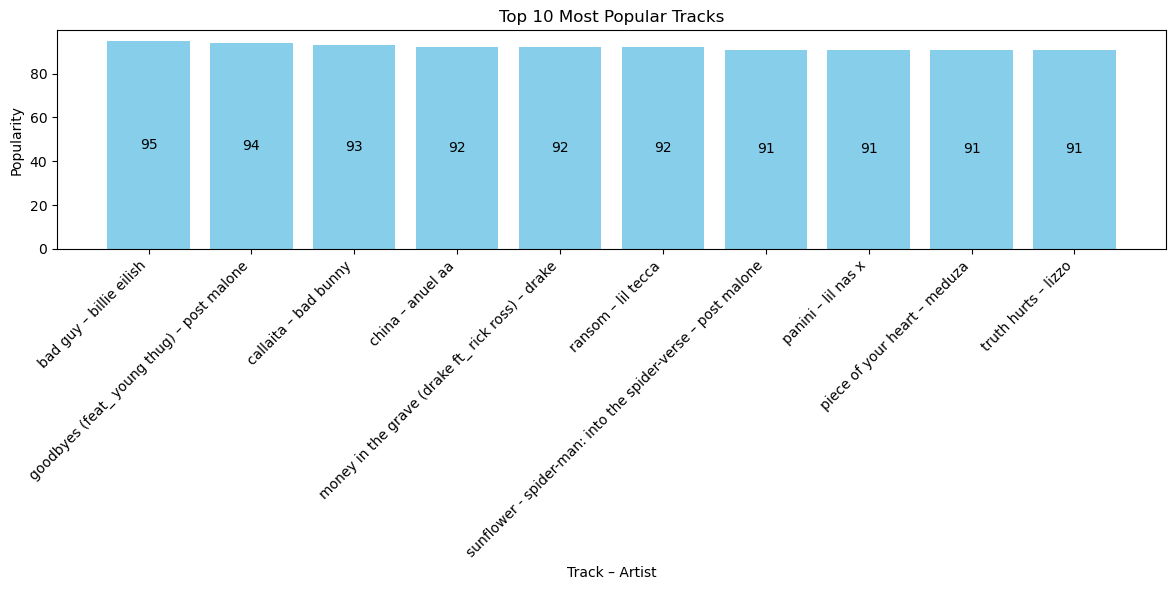

In [5]:
# Top 10 Most Popular Tracks
# --- Inspires bands by showing benchmarks ---

top_tracks = (
    df[["track_name", "artist_name", "genre", "popularity"]]
      .sort_values("popularity", ascending=False)
      .head(10)
)

top_tracks["label"] = top_tracks["track_name"] + " – " + top_tracks["artist_name"]

plt.figure(figsize=(12,6))
bars = plt.bar(top_tracks["label"], top_tracks["popularity"], color="skyblue")
plt.title("Top 10 Most Popular Tracks")
plt.xlabel("Track – Artist")
plt.ylabel("Popularity")
plt.xticks(rotation=45, ha="right")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f"{int(height)}",
             ha="center", va="center", fontsize=10, color="black")

plt.tight_layout()
plt.show()

In [6]:
# Top 5 artists with the most consistent popularity within each genre
# --- It shows which artists manage to maintain multiple popular songs in the same genre (not just one isolated hit) ---

artist_consistency = (
    df.groupby(["genre", "artist_name"])
      .agg(avg_popularity=("popularity", "mean"),
           total_tracks=("track_name", "count"))
      .reset_index()
      .query("total_tracks > 1")  # só artistas com mais de 1 faixa
      .sort_values(["avg_popularity", "total_tracks"], ascending=[False, False])
      .head(5)
)

print("Top 5 Artists with Consistent Popularity by Genre:")
print(artist_consistency)

Top 5 Artists with Consistent Popularity by Genre:
             genre    artist_name  avg_popularity  total_tracks
17         dfw rap    post malone            92.5             2
20      electropop  billie eilish            92.0             2
23           latin       j balvin            89.5             2
9      country rap      lil nas x            89.0             2
26  panamanian pop           sech            89.0             2


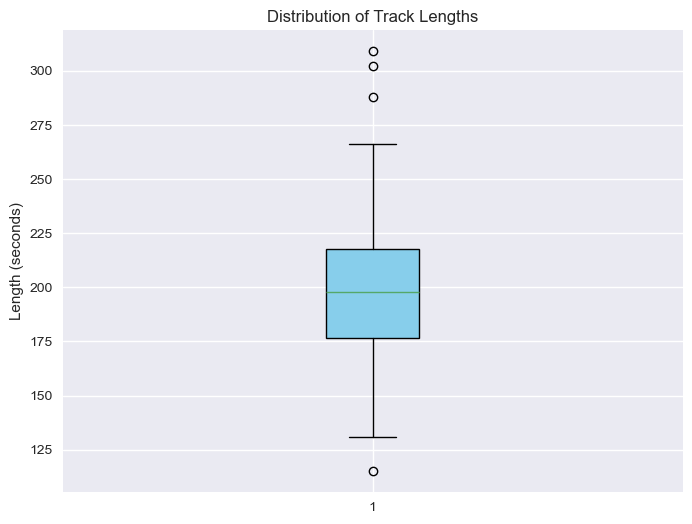

In [12]:
# Create box plot for track length distribution
plt.figure(figsize=(8, 6))
plt.boxplot(df['length'], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Distribution of Track Lengths')
plt.ylabel('Length (seconds)')
plt.grid(True)